# Novos casos de coronavírus (COVID-19), fornecidos por JHU CSSE https://systems.jhu.edu/research/public-health/ncov/


# Analise dos dados do Covid-19

In [3]:
import pandas as pd
import numpy as np

In [4]:
casos = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')

In [6]:
casos.tail()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20
478,NaN,Guernsey,49.4500,-2.580,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
479,NaN,Jersey,49.1900,-2.110,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
480,NaN,Puerto Rico,18.2000,-66.500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
481,NaN,Republic of the Congo,-1.4400,15.556,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
482,NaN,The Gambia,13.4667,-16.600,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0


# Casos de covid-119 no mundo Hoje!

In [7]:
casos.shape

(483, 62)

In [14]:
casos = np.sum(casos.iloc[ : , 4 : casos.shape[1]])
casos.index = pd.DatetimeIndex(casos.index)
casos.tail(10)

2020-03-10    118592.0
2020-03-11    125865.0
2020-03-12    128343.0
2020-03-13    145193.0
2020-03-14    156094.0
2020-03-15    167446.0
2020-03-16    181527.0
2020-03-17    197142.0
2020-03-18    214910.0
2020-03-19    242713.0
dtype: float64

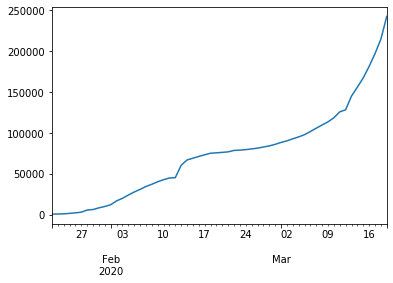

In [16]:
casos.plot()

# Mortes por covid-19 no mundo,Quantidade de pessoas mortas hoje no mundo.

In [28]:
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv')

In [29]:
mortes.shape

(468, 62)

In [30]:
mortes = np.sum(mortes.iloc[ : , 4 : mortes.shape[1]])
mortes.index = pd.DatetimeIndex(mortes.index)
mortes.tail(10)

2020-03-10    4262
2020-03-11    4615
2020-03-12    4720
2020-03-13    5404
2020-03-14    5819
2020-03-15    6440
2020-03-16    7126
2020-03-17    7905
2020-03-18    8733
2020-03-19    9867
dtype: int64

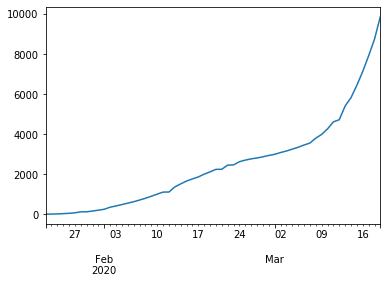

In [31]:
mortes.plot()

In [33]:
mortalidade = (mortes/casos)*100

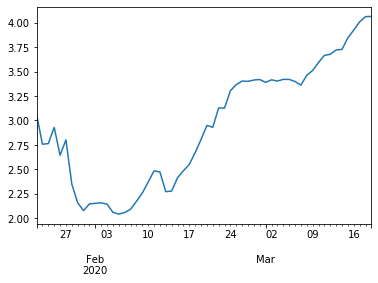

In [34]:
mortalidade.plot()

# *Mortalidade*

# Carregando dados dos Pacientes Recuperados

In [36]:
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv')

In [37]:
recuperados.shape

(468, 62)

In [38]:
recuperados = np.sum(recuperados.iloc[ : , 4 : recuperados.shape[1]])
recuperados.index = pd.DatetimeIndex(recuperados.index)
recuperados.tail(10)

2020-03-10    64404
2020-03-11    67003
2020-03-12    68324
2020-03-13    70251
2020-03-14    72624
2020-03-15    76034
2020-03-16    78088
2020-03-17    80840
2020-03-18    83207
2020-03-19    84854
dtype: int64

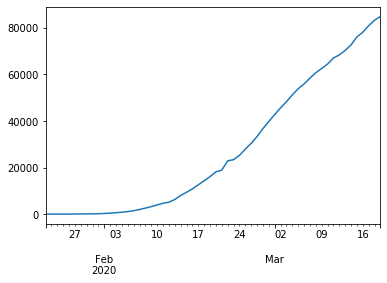

In [39]:
recuperados.plot()

# Pessoas Ativas com o Virus Covid-19 no Mundo. 

In [42]:
ativos = casos - (recuperados+mortes)

In [43]:
ativos.tail()

2020-03-15     84972.0
2020-03-16     96313.0
2020-03-17    108397.0
2020-03-18    122970.0
2020-03-19    147992.0
dtype: float64

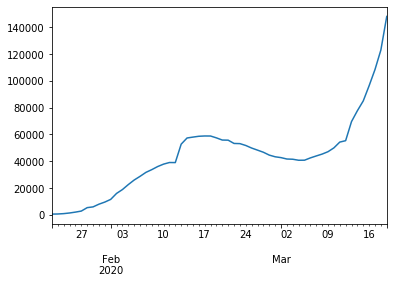

In [44]:
ativos.plot()


In [48]:
df = pd.concat([casos, ativos, recuperados, mortes], axis=1)

In [50]:
df.columns = (['casos', 'ativos', 'recuperados', 'mortes'])

In [51]:
df.tail()


,casos,ativos,recuperados,mortes
2020-03-15,167446.0,84972.0,76034,6440
2020-03-16,181527.0,96313.0,78088,7126
2020-03-17,197142.0,108397.0,80840,7905
2020-03-18,214910.0,122970.0,83207,8733
2020-03-19,242713.0,147992.0,84854,9867


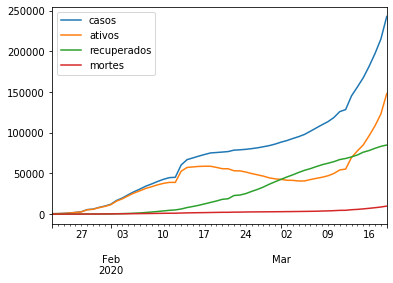

In [52]:
df.plot()
